Liquid Crystal Thermodynamics and Frank Elastic Constants
================================================

In [1]:
import sys
sys.path.insert(1, '../wlcstat/')

In [2]:
import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
import wlcstat.wlcave as wlcave
import wlcstat.wlcgreen as wlcgreen
import wlcstat.wlcstruc as wlcstruc
import wlcstat.poly_dyn as poly_dyn
import wlcstat.wlc_lcpoly as wlc_lcpoly
import wlcstat.poly_confine as poly_confine
import wlcstat.active_brown as active_brown

#from wlcstat.wlcave import *
#from wlcstat.wlcgreen import *

In [3]:
import importlib
importlib.reload(wlcave)
importlib.reload(wlcgreen)
importlib.reload(wlcstruc)
importlib.reload(poly_dyn)
importlib.reload(poly_confine)
importlib.reload(wlc_lcpoly)
importlib.reload(active_brown)

<module 'wlcstat.active_brown' from '/Users/asheshghosh/Documents/Research/Project/Liquid_Crystal/lc_thermo/wlcstat/active_brown.py'>

Evaluate the poles of the Green's function for a wlc in a quadrupole field

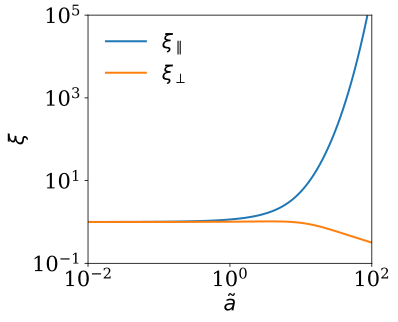

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize=(6,5))
font = {'family' : 'Serif',
    'weight':'normal',
    'size': 21}
plt.rc('font', **font)

lam0 = 1e-2
lamf = 1e2
nlam = 100
lamvec = np.logspace(np.log10(lam0), np.log10(lamf), nlam)

alpha_max = 5

m = 0
poles_m0 = np.zeros((nlam, alpha_max - abs(m) + 1))
m = 1
poles_m1 = np.zeros((nlam, alpha_max - abs(m) + 1))
m = 2
poles_m2 = np.zeros((nlam, alpha_max - abs(m) + 1))

for i in range(nlam):
    lam = lamvec[i]
    poles_m0[i,:] = wlc_lcpoly.eval_poles_lcpoly(lam, m=0, alpha_max=alpha_max)
    poles_m1[i,:] = wlc_lcpoly.eval_poles_lcpoly(lam, m=1, alpha_max=alpha_max)
    poles_m2[i,:] = wlc_lcpoly.eval_poles_lcpoly(lam, m=2, alpha_max=alpha_max)

ind_max = 2

#for i in range(1,ind_max):
plt.loglog(lamvec, -2/(poles_m0[:,1] - poles_m0[:,0]),'-',color='C0',
                 linewidth=2, label=r'$\xi_{\parallel}$')
plt.loglog(lamvec, -2*0.3333861910328168**(-1)/(poles_m1[:,1] - poles_m0[:,0]),'-',color='C1',
               linewidth=2, label=r'$\xi_{\perp}$')
#    plt.plot(lamvec, poles_m2[:,i] - poles_m0[:,0],'-',color='C2')
    
#plt.xscale('log')
#plt.yscale('log')

plt.legend(frameon=False,fontsize=20)
plt.xlabel(r'$\tilde{a}$')
plt.ylabel(r'$\xi$')
plt.xlim(1e-2,1e2)
plt.ylim(1e-1,1e5)
plt.tight_layout()
#plt.savefig('Figure1.pdf')
plt.show()

In [35]:
-2/(poles_m1[0,1] - poles_m0[0,0])

0.3333861910328168

Evaluate the residues of the Green's function for a wlc in a quadrupole field

In [44]:
importlib.reload(wlc_lcpoly)

<module 'wlcstat.wlc_lcpoly' from '../wlcstat/wlcstat/wlc_lcpoly.py'>

In [45]:
lam = 1
m = 0
poles = wlc_lcpoly.eval_poles_lcpoly(lam, m, alpha_max=5)
residues0 = wlc_lcpoly.eval_residues_lcpoly(lam, m, poles, l_zero_only=True, l_max=5, alpha_max=5, l_cont_frac_max=50)
residues = wlc_lcpoly.eval_residues_lcpoly(lam, m, poles, l_zero_only=False, l_max=5, alpha_max=5, l_cont_frac_max=50)

In [46]:
print(residues[0,0,:])
print(residues0)

[9.97383554e-01+0.j 0.00000000e+00+0.j 2.61637055e-03+0.j
 0.00000000e+00+0.j 7.51369866e-08+0.j 0.00000000e+00+0.j]
[9.97383554e-01+0.j 0.00000000e+00+0.j 2.61637055e-03+0.j
 0.00000000e+00+0.j 7.51369866e-08+0.j 0.00000000e+00+0.j]


Evaluate the order parameter versus the field strength

In [47]:
importlib.reload(wlc_lcpoly)

<module 'wlcstat.wlc_lcpoly' from '../wlcstat/wlcstat/wlc_lcpoly.py'>

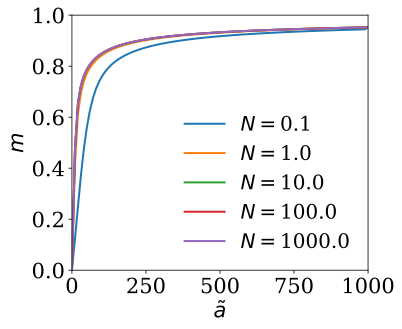

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize=(6,5))
font = {'family' : 'serif',
    'weight':'normal',
    'size': 21}
plt.rc('font', **font)

lam0 = 0.1
lamf = 1000
nlam = 100
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.array([0.1, 1, 10, 100, 1000])

for i_l in range(len(length_kuhn_vec)):
    length_kuhn = length_kuhn_vec[i_l]
    m_val = np.zeros(nlam)
    for i in range(nlam):
        m_val[i] = wlc_lcpoly.m_lcpoly(length_kuhn, lam[i], alpha_max=25, l_cont_frac_max=50)
    
    plt.plot(lam, m_val,'-',linewidth=2, label=r'$N=$'+str(length_kuhn))
    
    
plt.legend(frameon=False,fontsize=20)
plt.xlabel(r'$\tilde{a}$')
plt.ylabel(r'$m$')
plt.xlim(0,1000)
plt.ylim(0,1)
plt.tight_layout()
#plt.savefig('Figure1.pdf')
plt.show()

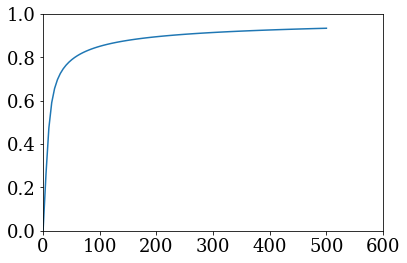

In [49]:
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)


plt.plot(lam, m_val,'-')

#plt.yscale('log')
#plt.xscale('log')
plt.xlim([0, 600])
plt.ylim([0, 1])

plt.tight_layout()
plt.show()

Test the evaluation of $\langle R_{\parallel}^{2} \rangle$ and $\langle R_{\perp}^{2} \rangle$

In [50]:
importlib.reload(wlc_lcpoly)

<module 'wlcstat.wlc_lcpoly' from '../wlcstat/wlcstat/wlc_lcpoly.py'>

No handles with labels found to put in legend.


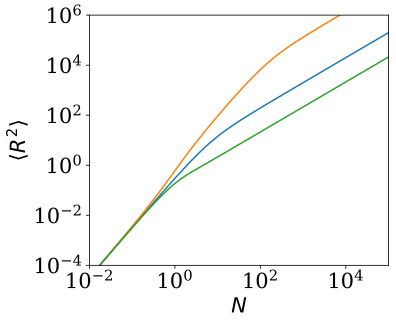

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize=(6,5))
font = {'family' : 'Serif',
    'weight':'normal',
    'size': 21}
plt.rc('font', **font)


length0 = 1e-2 / 6
lengthf = 1e5 / 6
nlength = 100
length_kuhn = np.logspace(np.log10(length0), np.log10(lengthf), nlength)
lp = 3
kappa = 3
lam = 2 * lp * kappa

r_2_par, r_2_perp, xi_par, xi_perp = wlc_lcpoly.r_2_lcpoly(length_kuhn, lam, alpha_max=5)
r_2_lam0 = wlcave.r2_ave(length_kuhn) / 3
m_val = wlc_lcpoly.m_lcpoly(length_kuhn, lam)

plt.plot(length_kuhn * (2 * lp), r_2_lam0 * (2 * lp) ** 2,'-', color = 'C0')
plt.plot(length_kuhn * (2 * lp), r_2_par * (2 * lp) ** 2,'-', color = 'C1')
plt.plot(length_kuhn * (2 * lp), r_2_perp * (2 * lp) ** 2,'-', color = 'C2')

plt.xscale('log')    
plt.yscale('log')

xi_par = np.exp(2 * lam ** 0.5) / (16 * lam * (1 - 1 / lam ** 0.5))
xi_perp = 1 / lam ** 0.5 / (1 - 1 / (2 * lam ** 0.5))

#plt.plot(length_kuhn * (2 * lp), (1 + 2 * m_val) * length_kuhn * xi_par * (2 * lp) ** 2 / 3,':', color = 'C1')
#plt.plot(length_kuhn * (2 * lp), (1 - m_val) * length_kuhn * xi_perp * (2 * lp) ** 2 / 3,':', color = 'C2')




    
#plt.legend(frameon=False,fontsize=20)
plt.xlabel(r'$N$')
plt.ylabel(r'$\langle R^2 \rangle$')
plt.xlim([1e-2, 1e5])
plt.ylim([1e-4, 1e6])
plt.tight_layout()
plt.savefig('R_2.pdf')
plt.show()

Test the Frank elastic constant calculation

In [53]:
importlib.reload(wlc_lcpoly)

<module 'wlcstat.wlc_lcpoly' from '../wlcstat/wlcstat/wlc_lcpoly.py'>

In [4]:
lam = 1e-5
length_kuhn = 100
q_val, m_val, y21_y21, y21_ux_ux_y21, y21_uy_uy_y21, y21_uz_uz_y21 = (
    wlc_lcpoly.elastic_lcpoly(length_kuhn, lam, alpha_max=10))

In [5]:
print(q_val, m_val, y21_y21, y21_ux_ux_y21, y21_uy_uy_y21, y21_uz_uz_y21)

0.9999999999997531 4.43703914498883e-07 0.00026481626731470343 1.044543556137084e-05 1.0482266387773565e-06 1.0445425443880997e-05


In [273]:
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

alpha_max = 15

lam0 = 1e-5
lamf = 50
nlam = 50
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.array([0.01, 0.1, 1, 10, 100, 1000, 10000])
n_length = len(length_kuhn_vec)

q_val = np.zeros((nlam, n_length))
m_val = np.zeros((nlam, n_length))
y21_y21 = np.zeros((nlam, n_length))
y21_ux_ux_y21 = np.zeros((nlam, n_length))
y21_uy_uy_y21 = np.zeros((nlam, n_length))
y21_uz_uz_y21 = np.zeros((nlam, n_length))

#for i_l in range(len(length_kuhn_vec)):
#    length_kuhn = length_kuhn_vec[i_l]
#    print(i_l)

for i in range(nlam):
    q_val[i, :], m_val[i, :], y21_y21[i, :], y21_ux_ux_y21[i, :], y21_uy_uy_y21[i, :], y21_uz_uz_y21[i, :] = (
        wlc_lcpoly.elastic_lcpoly(length_kuhn_vec, lam[i], alpha_max=alpha_max))
    print(i)

np.save('data/q_val', q_val)
np.save('data/m_val', m_val)
np.save('data/y21_y21', y21_y21)
np.save('data/y21_ux_ux_y21', y21_ux_ux_y21)
np.save('data/y21_uy_uy_y21', y21_uy_uy_y21)
np.save('data/y21_uz_uz_y21', y21_uz_uz_y21)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [35]:
q_val = np.load('data/q_val.npy')
m_val = np.load('data/m_val.npy')
y21_y21 = np.load('data/y21_y21.npy')
y21_ux_ux_y21 = np.load('data/y21_ux_ux_y21.npy')
y21_uy_uy_y21 = np.load('data/y21_uy_uy_y21.npy')
y21_uz_uz_y21 = np.load('data/y21_uz_uz_y21.npy')

../wlcstat/wlcstat/wlc_lcpoly.py:420: RuntimeWarning: overflow encountered in exp
  rho2_ave = (np.exp(a_val) / a_val / q_val - 1 / (2 * a_val))
../wlcstat/wlcstat/wlc_lcpoly.py:420: RuntimeWarning: invalid value encountered in true_divide
  rho2_ave = (np.exp(a_val) / a_val / q_val - 1 / (2 * a_val))
../wlcstat/wlcstat/wlc_lcpoly.py:421: RuntimeWarning: overflow encountered in exp
  rho4_ave = (np.exp(a_val) * (2 * a_val - 3) / (2 * a_val ** 2) / q_val + 3 / (4 * a_val ** 2))
../wlcstat/wlcstat/wlc_lcpoly.py:421: RuntimeWarning: invalid value encountered in true_divide
  rho4_ave = (np.exp(a_val) * (2 * a_val - 3) / (2 * a_val ** 2) / q_val + 3 / (4 * a_val ** 2))
../wlcstat/wlcstat/wlc_lcpoly.py:422: RuntimeWarning: overflow encountered in exp
  rho6_ave = (np.exp(a_val) * (4 * a_val ** 2 - 10 * a_val + 15) / (4 * a_val ** 3) / q_val
../wlcstat/wlcstat/wlc_lcpoly.py:422: RuntimeWarning: invalid value encountered in true_divide
  rho6_ave = (np.exp(a_val) * (4 * a_val ** 2 - 10 * a_va

(5.0, 100.0)

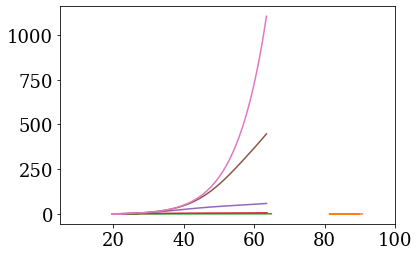

In [36]:
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

#plt.plot(lam, m_val,'-')
#plt.plot(lam, y21_y21,'-')
#plt.plot(lam, y21_ux_ux_y21 / y21_y21,'-')
#plt.plot(lam, y21_y21,'-')

lam0 = 1e-5
lamf = 50
nlam = 50
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.array([0.01, 0.1, 1, 10, 100, 1000, 10000])

q_val_rr, m_val_rr, y21_y21_rr, y21_ux_ux_y21_rr, y21_uy_uy_y21_rr, y21_uz_uz_y21_rr = (
    wlc_lcpoly.elastic_rr(length_kuhn_vec, lam))

i_l = 0

for i_l in range(len(m_val[0,:])):
    k_bend = 3 * m_val[:, i_l] ** 2 * y21_uz_uz_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_twist = 3 * m_val[:, i_l] ** 2 * y21_uy_uy_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_splay = 3 * m_val[:, i_l] ** 2 * y21_ux_ux_y21[:, i_l] / y21_y21[:, i_l] ** 2
    
    k_bend_rr = 3 * m_val_rr[:, i_l] ** 2 * y21_uz_uz_y21_rr[:, i_l] / y21_y21_rr[:, i_l] ** 2
    k_twist_rr = 3 * m_val_rr[:, i_l] ** 2 * y21_uy_uy_y21_rr[:, i_l] / y21_y21_rr[:, i_l] ** 2
    k_splay_rr = 3 * m_val_rr[:, i_l] ** 2 * y21_ux_ux_y21_rr[:, i_l] / y21_y21_rr[:, i_l] ** 2

#    plt.plot(lam, k_bend,'-')
#    plt.plot(lam, k_twist,'-')
    plt.plot(lam / m_val[:, i_l], k_splay / length_kuhn_vec[i_l],'-')
#    plt.plot(lam, k_splay_rr / k_bend_rr,'--')
#    plt.plot(lam, 0 * lam + 1,'-')
    
#plt.yscale('log')
    
#plt.plot(lam, y21_uy_uy_y21 / y21_y21 ** 2,'-')
#plt.plot(lam, y21_uz_uz_y21 / y21_y21 ** 2,'-')

plt.xlim([5, 100])
#plt.ylim([0.01, 1])

../wlcstat/wlcstat/wlc_lcpoly.py:420: RuntimeWarning: overflow encountered in exp
  rho2_ave = (np.exp(a_val) / a_val / q_val - 1 / (2 * a_val))
../wlcstat/wlcstat/wlc_lcpoly.py:420: RuntimeWarning: invalid value encountered in true_divide
  rho2_ave = (np.exp(a_val) / a_val / q_val - 1 / (2 * a_val))
../wlcstat/wlcstat/wlc_lcpoly.py:421: RuntimeWarning: overflow encountered in exp
  rho4_ave = (np.exp(a_val) * (2 * a_val - 3) / (2 * a_val ** 2) / q_val + 3 / (4 * a_val ** 2))
../wlcstat/wlcstat/wlc_lcpoly.py:421: RuntimeWarning: invalid value encountered in true_divide
  rho4_ave = (np.exp(a_val) * (2 * a_val - 3) / (2 * a_val ** 2) / q_val + 3 / (4 * a_val ** 2))
../wlcstat/wlcstat/wlc_lcpoly.py:422: RuntimeWarning: overflow encountered in exp
  rho6_ave = (np.exp(a_val) * (4 * a_val ** 2 - 10 * a_val + 15) / (4 * a_val ** 3) / q_val
../wlcstat/wlcstat/wlc_lcpoly.py:422: RuntimeWarning: invalid value encountered in true_divide
  rho6_ave = (np.exp(a_val) * (4 * a_val ** 2 - 10 * a_va

(0.0, 200.0)

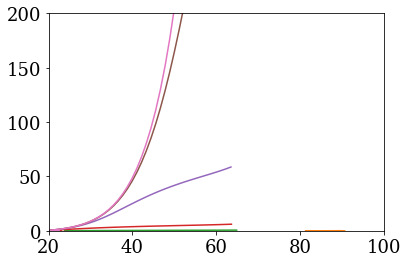

In [37]:
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

#plt.plot(lam, m_val,'-')
#plt.plot(lam, y21_y21,'-')
#plt.plot(lam, y21_ux_ux_y21 / y21_y21,'-')
#plt.plot(lam, y21_y21,'-')

lam0 = 1e-5
lamf = 50
nlam = 50
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.array([0.01, 0.1, 1, 10, 100, 1000, 10000])

q_val_rr, m_val_rr, y21_y21_rr, y21_ux_ux_y21_rr, y21_uy_uy_y21_rr, y21_uz_uz_y21_rr = (
    wlc_lcpoly.elastic_rr(length_kuhn_vec, lam))

i_l = 0

for i_l in range(len(m_val[0,:])):
    k_bend = 3 * m_val[:, i_l] ** 2 * y21_uz_uz_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_twist = 3 * m_val[:, i_l] ** 2 * y21_uy_uy_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_splay = 3 * m_val[:, i_l] ** 2 * y21_ux_ux_y21[:, i_l] / y21_y21[:, i_l] ** 2
    
    k_bend_rr = 3 * m_val_rr[:, i_l] ** 2 * y21_uz_uz_y21_rr[:, i_l] / y21_y21_rr[:, i_l] ** 2
    k_twist_rr = 3 * m_val_rr[:, i_l] ** 2 * y21_uy_uy_y21_rr[:, i_l] / y21_y21_rr[:, i_l] ** 2
    k_splay_rr = 3 * m_val_rr[:, i_l] ** 2 * y21_ux_ux_y21_rr[:, i_l] / y21_y21_rr[:, i_l] ** 2

#    plt.plot(lam, k_bend / length_kuhn_vec[i_l],'r-')
#    plt.plot(lam, k_twist / length_kuhn_vec[i_l],'g-')
    plt.plot(lam / m_val[:, i_l], k_splay / length_kuhn_vec[i_l],'-')
#    plt.plot(lam, k_bend_rr / length_kuhn_vec[i_l],'r--')
#    plt.plot(lam, 0 * lam + 1,'-')
    
    
#plt.plot(lam, y21_uy_uy_y21 / y21_y21 ** 2,'-')
#plt.plot(lam, y21_uz_uz_y21 / y21_y21 ** 2,'-')

plt.xlim([20, 100])
plt.ylim([0, 200])